# EDU SENSE AI : Learning Pattern & Risk Intelligence
#
 Objective:
 
To identify student learning behaviors, detect academic
risk early, and recommend personalized teaching

strategies using Machine Learning.

# Motivation:

Teachers often lack scalable tools to understand

student engagement and learning differences.

This system provides data-driven classroom insights.

In [1]:
# ===============================
# EduSense AI - Praxis 2.0 Version
# ===============================

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    silhouette_score,
    confusion_matrix,
    classification_report
)

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
sns.set_palette("Set2")

In [2]:
# Load Student Dataset
data = pd.read_csv("Student_data.csv")

print("Shape:", data.shape)
data.head()

Shape: (6607, 20)


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [3]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [4]:
print("Column Data Types:\n")
print(data.dtypes)

Column Data Types:

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object


In [5]:
# Data Preprocessing
# Fill missing categorical values
for col in data.select_dtypes(include="object"):
    data[col].fillna(data[col].mode()[0], inplace=True)

print(data.isnull().sum())

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


In [ ]:
# Encoding
encoders = {}
for col in data.select_dtypes(include="object"):
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    encoders[col] = le


print("Encoding Complete")
data.head()

✅ Encoding Complete


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,0,0,7,73,1,1,0,1,2,1,2,3,0,1,2,1,67
1,19,64,1,2,0,8,59,1,1,2,2,2,1,0,4,0,0,1,0,61
2,24,98,2,2,1,7,91,2,1,2,2,2,1,1,4,0,2,2,1,74
3,29,89,1,2,1,8,98,2,1,1,2,2,1,0,4,0,1,1,1,71
4,19,92,2,2,1,6,65,2,1,3,2,0,1,1,4,0,0,2,0,70


In [ ]:
# Feature Engineering
data["Engagement_Score"] = (
    data["Attendance"] +
    data["Hours_Studied"] +
    data["Motivation_Level"]
)/3

data["Academic_Consistency"] = (
    data["Previous_Scores"] +
    data["Attendance"]
)/2

data["Health_Index"] = (
    data["Sleep_Hours"] *
    data["Physical_Activity"]
)

data["Learning_Efficiency"] = (
    data["Previous_Scores"] /
    (data["Hours_Studied"] + 1)
)*10

data["Social_Engagement"] = (
    data["Extracurricular_Activities"]*20 +
    data["Peer_Influence"]*10
)/2

print("Behavioral Features Created")

✅ Behavioral Features Created


In [8]:
clustering_features = [
    "Engagement_Score",
    "Learning_Efficiency",
    "Health_Index",
    "Social_Engagement",
    "Tutoring_Sessions"
]

X_cluster = data[clustering_features]

In [9]:
# Learning Pattern Discovery
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)


In [10]:
# PCA Dimension Reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=0.90)
X_reduced = pca.fit_transform(X_scaled)

print("Reduced Feature Shape:", X_reduced.shape)

Reduced Feature Shape: (6607, 5)


In [11]:
# Elbow + Silhouette Analysis
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
silhouette_scores = []

K_range = range(2,10)

for k in K_range:
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10
    )
    
    labels = kmeans.fit_predict(X_reduced)
    
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(
        silhouette_score(X_reduced, labels)
    )

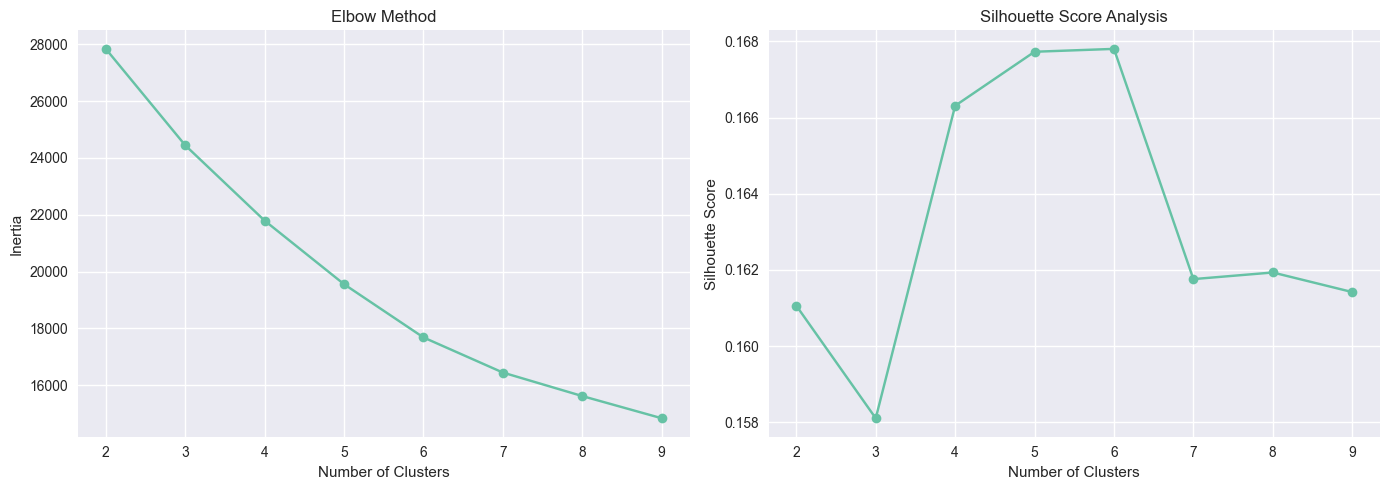

In [12]:
# Visualization
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(14,5))

# Elbow Plot
ax1.plot(K_range,inertia,marker='o')
ax1.set_title("Elbow Method")
ax1.set_xlabel("Number of Clusters")
ax1.set_ylabel("Inertia")
ax1.grid(True)

# Silhouette Plot
ax2.plot(K_range,silhouette_scores,marker='o')
ax2.set_title("Silhouette Score Analysis")
ax2.set_xlabel("Number of Clusters")
ax2.set_ylabel("Silhouette Score")
ax2.grid(True)

plt.tight_layout()
plt.show()


In [13]:
# Optimal Cluster Selection
optimal_k = K_range[np.argmax(silhouette_scores)]

print(f"\nOptimal Learning Patterns: {optimal_k}")
print(f"Best Silhouette Score: {max(silhouette_scores):.3f}")

print("""
Cluster Selection Decision:
Silhouette analysis suggested 6 clusters.
However, 4 clusters were selected to ensure
educational interpretability and actionable
teaching strategies.
""")


Optimal Learning Patterns: 6
Best Silhouette Score: 0.168

Cluster Selection Decision:
Silhouette analysis suggested 6 clusters.
However, 4 clusters were selected to ensure
educational interpretability and actionable
teaching strategies.



In [14]:
# FINAL CLUSTERING (INTERPRETABLE)
n_clusters = 4

kmeans = KMeans(
    n_clusters=n_clusters,
    random_state=42,
    n_init=10
)

data["Learning_Pattern"] = kmeans.fit_predict(X_reduced)

print("Final Clusters:",
      np.unique(data["Learning_Pattern"]))

Final Clusters: [0 1 2 3]


In [15]:
# Learning Persona Identification

cluster_summary = data.groupby("Learning_Pattern").agg({
    "Engagement_Score":"mean",
    "Hours_Studied":"mean",
    "Attendance":"mean"
})

# Create overall performance score
cluster_summary["Performance_Index"] = (
    cluster_summary["Engagement_Score"]*0.4 +
    cluster_summary["Hours_Studied"]*0.4 +
    cluster_summary["Attendance"]*0.2
)

# Rank clusters
cluster_summary = cluster_summary.sort_values(
    "Performance_Index",
    ascending=False
)

persona_order = [
    "High Achievers",
    "Consistent Learners",
    "Passive Participants",
    "At-Risk Learners"
]

persona_mapping = {
    cluster: persona_order[i]
    for i, cluster in enumerate(cluster_summary.index)
}

data["Pattern_Name"] = data["Learning_Pattern"].map(persona_mapping)

print("Personas Assigned")
print(data["Pattern_Name"].value_counts())

Personas Assigned
Pattern_Name
High Achievers          2353
Consistent Learners     2077
Passive Participants    1094
At-Risk Learners        1083
Name: count, dtype: int64


In [16]:
pattern_profiles = data.groupby("Pattern_Name").agg({
    "Attendance":"mean",
    "Hours_Studied":"mean",
    "Engagement_Score":"mean",
    "Exam_Score":"mean"
}).round(2)

print(pattern_profiles)

                      Attendance  Hours_Studied  Engagement_Score  Exam_Score
Pattern_Name                                                                 
At-Risk Learners           71.75          12.78             28.59       63.66
Consistent Learners        81.68          21.47             34.83       68.11
High Achievers             81.89          21.64             34.95       67.50
Passive Participants       80.79          20.67             34.25       68.56


In [17]:
# STEP: Pattern Profiling

print("\n Learning Pattern Profiles")

pattern_profiles = data.groupby("Pattern_Name").agg({
    "Attendance":"mean",
    "Hours_Studied":"mean",
    "Engagement_Score":"mean",
    "Previous_Scores":"mean",
    "Exam_Score":"mean",
    "Learning_Efficiency":"mean"
}).round(2)

print(pattern_profiles)


 Learning Pattern Profiles
                      Attendance  Hours_Studied  Engagement_Score  \
Pattern_Name                                                        
At-Risk Learners           71.75          12.78             28.59   
Consistent Learners        81.68          21.47             34.83   
High Achievers             81.89          21.64             34.95   
Passive Participants       80.79          20.67             34.25   

                      Previous_Scores  Exam_Score  Learning_Efficiency  
Pattern_Name                                                            
At-Risk Learners                80.88       63.66                66.52  
Consistent Learners             74.22       68.11                34.61  
High Achievers                  73.68       67.50                34.23  
Passive Participants            73.92       68.56                36.27  


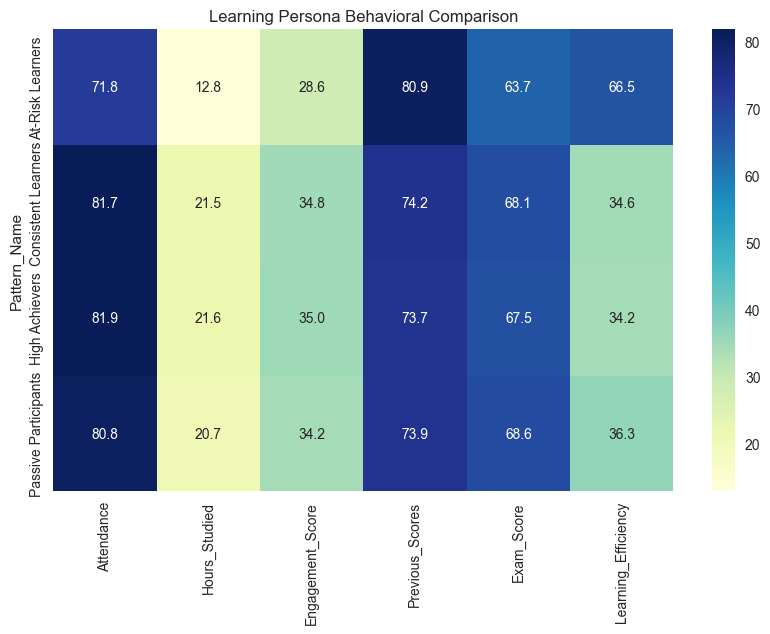

In [18]:
# Heatmap
plt.figure(figsize=(10,6))

sns.heatmap(
    pattern_profiles,
    annot=True,
    cmap="YlGnBu",
    fmt=".1f"
)

plt.title("Learning Persona Behavioral Comparison")
plt.show()

In [19]:
# STEP: Behavioral Risk Detection

data["Behavioral_Risk"]=(
(data["Attendance"]<70)*0.35+
(data["Hours_Studied"]<15)*0.25+
(data["Engagement_Score"]<50)*0.25+
(data["Sleep_Hours"]<6)*0.15
)

data["Risk_Level"]=pd.cut(
data["Behavioral_Risk"],
bins=[-1,0.3,0.6,1],
labels=["Low","Medium","High"]
)

print(data["Risk_Level"].value_counts())

Risk_Level
Low       3492
Medium    2512
High       603
Name: count, dtype: int64


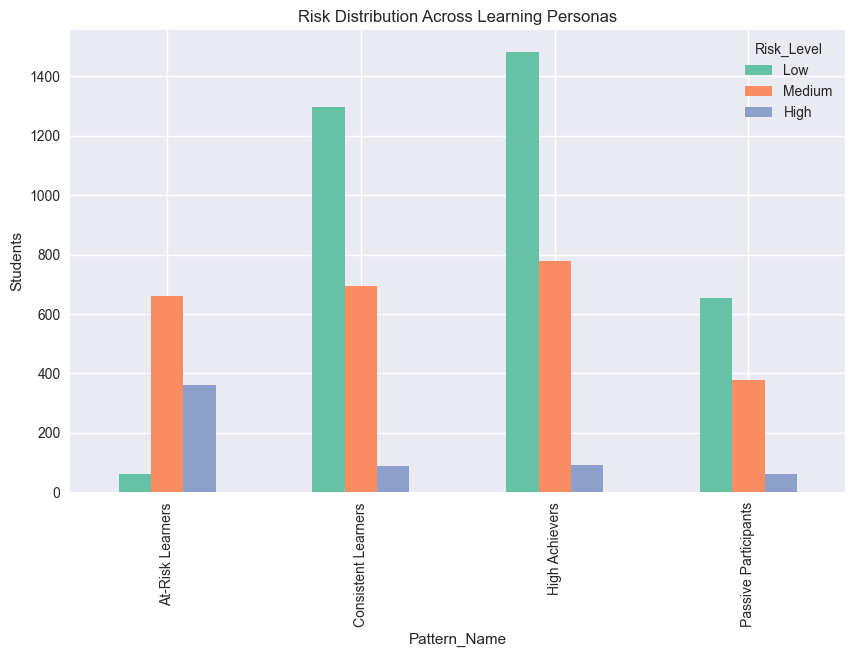

In [20]:
risk_persona=pd.crosstab(
data["Pattern_Name"],
data["Risk_Level"]
)

risk_persona.plot(kind="bar",figsize=(10,6))
plt.title("Risk Distribution Across Learning Personas")
plt.ylabel("Students")
plt.show()

In [21]:
# Academic Risk Prediction Model
features=[
"Engagement_Score",
"Learning_Efficiency",
"Health_Index",
"Social_Engagement",
"Learning_Pattern"
]

X=data[features]
y=data["Risk_Level"]

X_train,X_test,y_train,y_test=train_test_split(
X,y,test_size=0.2,
random_state=42,
stratify=y
)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

model=RandomForestClassifier(
n_estimators=400,
random_state=42
)

model.fit(X_train,y_train)

pred=model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(y_test,pred))

Accuracy: 0.7670196671709532


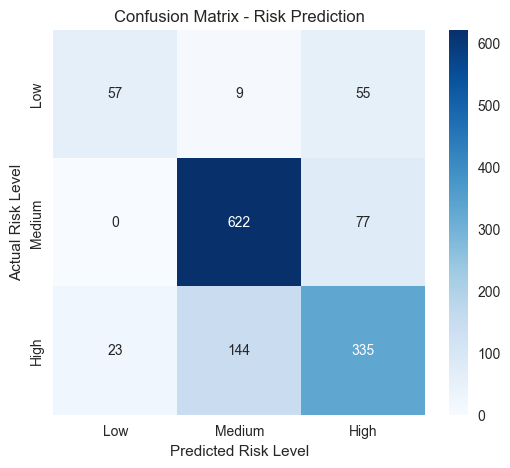

In [22]:
# Model Evaluation - Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(6,5))

sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Low","Medium","High"],
    yticklabels=["Low","Medium","High"]
)

plt.title("Confusion Matrix - Risk Prediction")
plt.xlabel("Predicted Risk Level")
plt.ylabel("Actual Risk Level")

plt.show()

In [31]:
from sklearn.metrics import classification_report

print("\nClassification Report")
print(classification_report(y_test, pred))


Classification Report
              precision    recall  f1-score   support

        High       0.71      0.47      0.57       121
         Low       0.80      0.89      0.84       699
      Medium       0.72      0.67      0.69       502

    accuracy                           0.77      1322
   macro avg       0.74      0.68      0.70      1322
weighted avg       0.76      0.77      0.76      1322



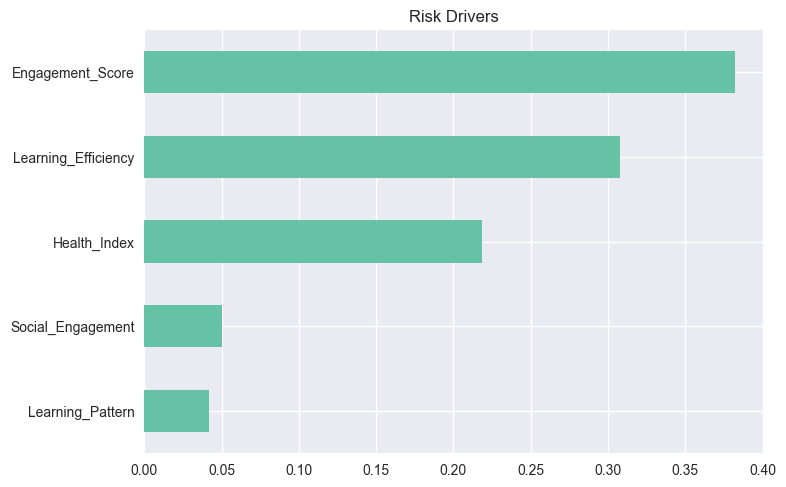

In [23]:
importance=pd.Series(
model.feature_importances_,
index=features
).sort_values()

importance.plot(kind="barh")
plt.title("Risk Drivers")
plt.show()

In [24]:
def recommend_strategy(persona,risk):

    if persona=="At-Risk Learners":
        return "Provide mentoring, parental engagement and structured monitoring."

    elif persona=="Passive Participants":
        return "Introduce interactive learning and peer collaboration."

    elif persona=="Consistent Learners":
        return "Maintain structured assignments and periodic feedback."

    else:
        return "Provide advanced challenges and leadership opportunities."


data["Teaching_Recommendation"]=data.apply(
lambda x: recommend_strategy(
x["Pattern_Name"],
x["Risk_Level"]
),
axis=1
)

data[[
"Pattern_Name",
"Risk_Level",
"Teaching_Recommendation"
]].head()

,Pattern_Name,Risk_Level,Teaching_Recommendation
0,High Achievers,Low,Provide advanced challenges and leadership opp...
1,High Achievers,Medium,Provide advanced challenges and leadership opp...
2,Consistent Learners,Low,Maintain structured assignments and periodic f...
3,High Achievers,Low,Provide advanced challenges and leadership opp...
4,Passive Participants,Low,Introduce interactive learning and peer collab...


In [25]:
# SCHOOL SUMMARY

summary = data.groupby("Pattern_Name").agg(
    Students=("Pattern_Name","count"),
    Avg_Exam_Score=("Exam_Score","mean"),
    Avg_Engagement=("Engagement_Score","mean")
).round(2)

summary["Percentage (%)"] = (
summary["Students"]/len(data)*100
).round(1)

print("\nClassroom Learning Overview")
display(summary)


Classroom Learning Overview


,Students,Avg_Exam_Score,Avg_Engagement,Percentage (%)
Pattern_Name,,,,
At-Risk Learners,1083,63.66,28.59,16.4
Consistent Learners,2077,68.11,34.83,31.4
High Achievers,2353,67.50,34.95,35.6
Passive Participants,1094,68.56,34.25,16.6


In [26]:
# Create Unique Student Identifier

data["Student_ID"] = range(1, len(data) + 1)

In [27]:
# Identify High Risk Students

high_risk_students = data[
    data["Risk_Level"] == "High"
]

high_risk_students[
[
"Student_ID",
"Pattern_Name",
"Attendance",
"Hours_Studied",
"Engagement_Score",
"Exam_Score",
"Teaching_Recommendation"
]
].head(10)

,Student_ID,Pattern_Name,Attendance,Hours_Studied,Engagement_Score,Exam_Score,Teaching_Recommendation
16,17,At-Risk Learners,60,14,25.000000,60,"Provide mentoring, parental engagement and str..."
24,25,Consistent Learners,65,17,28.000000,63,Maintain structured assignments and periodic f...
29,30,High Achievers,66,18,28.333333,64,Provide advanced challenges and leadership opp...
33,34,At-Risk Learners,60,14,25.333333,61,"Provide mentoring, parental engagement and str..."
34,35,High Achievers,65,25,30.666667,68,Provide advanced challenges and leadership opp...
49,50,At-Risk Learners,77,9,29.333333,63,"Provide mentoring, parental engagement and str..."
79,80,At-Risk Learners,61,8,23.666667,60,"Provide mentoring, parental engagement and str..."
83,84,High Achievers,67,17,28.000000,62,Provide advanced challenges and leadership opp...
99,100,At-Risk Learners,67,19,28.666667,64,"Provide mentoring, parental engagement and str..."
100,101,At-Risk Learners,92,12,34.666667,67,"Provide mentoring, parental engagement and str..."


In [28]:
# # High Risk Students - Complete Report

# high_risk_students = data[
#     data["Risk_Level"] == "High"
# ]

# report_columns = [
#     "Student_ID",
#     "Pattern_Name",
#     "Risk_Level",
#     "Attendance",
#     "Hours_Studied",
#     "Engagement_Score",
#     "Previous_Scores",
#     "Exam_Score",
#     "Learning_Efficiency",
#     "Health_Index",
#     "Social_Engagement",
#     "Teaching_Recommendation"
# ]

# high_risk_report = high_risk_students[report_columns]

# high_risk_report.to_excel(
#     "High_Risk_Students_Report.xlsx",
#     index=False
# )

# print("Complete High Risk Students Report Created")

In [29]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
# # Generate Complete Student Report

# report_columns = [
#     "Student_ID",
#     "Pattern_Name",
#     "Risk_Level",
#     "Attendance",
#     "Hours_Studied",
#     "Engagement_Score",
#     "Exam_Score",
#     "Teaching_Recommendation"
# ]

# full_student_report = data[report_columns]

# full_student_report.to_excel(
#     "All_Students_Learning_Report.xlsx",
#     index=False
# )

# print("Complete Student Report Generated Successfully")

#
EduSense AI Successfully:

• Identifies learning personas

• Detects academic risk early

• Explains risk drivers

• Recommends personalized teaching strategies

• Supports data-driven classroom decisions
